In [3]:
import pandas as pd

In [13]:
df = pd.read_csv(r"C:\Users\kanka\OneDrive\Desktop\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [19]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [21]:
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
from sklearn.metrics import accuracy_score

In [37]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8044692737430168


In [39]:
import matplotlib.pyplot as plt

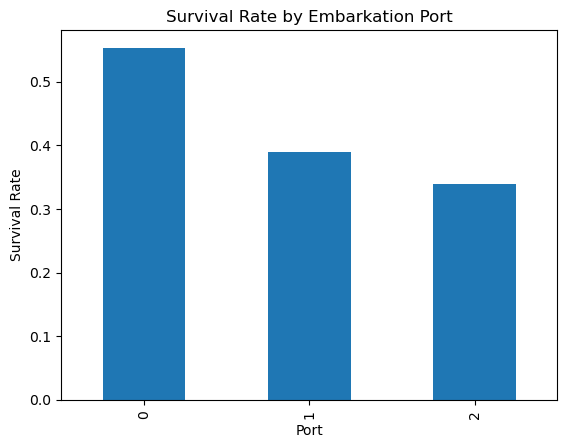

In [41]:
df.groupby("Embarked")["Survived"].mean().plot(kind='bar')
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Port")
plt.ylabel("Survival Rate")
plt.show()